<a href="https://www.kaggle.com/code/gulhilalatalay/ww2-weather?scriptVersionId=275242022" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weatherww2/Summary of Weather.csv
/kaggle/input/weatherww2/Weather Station Locations.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('/kaggle/input/weatherww2/Summary of Weather.csv',low_memory=False)

In [4]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

# Data Cleaning

In [6]:
df.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [7]:
df.drop(labels=['WindGustSpd','PoorWeather','DR','SPD','SND','FT','FB','FTI','ITH','PGT','TSHDSBRSGF','SD3','RHX','RHN','RVG','WTE'],axis= 1, inplace = True)

In [8]:
df.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,0,42,7,1,0.04,78.0,72.0,75.0,0
1,10001,1942-7-2,0,28.888889,21.666667,25.555556,0,42,7,2,0,84.0,71.0,78.0,0
2,10001,1942-7-3,2.54,26.111111,22.222222,24.444444,0,42,7,3,0.1,79.0,72.0,76.0,0
3,10001,1942-7-4,2.54,26.666667,22.222222,24.444444,0,42,7,4,0.1,80.0,72.0,76.0,0
4,10001,1942-7-5,0,26.666667,21.666667,24.444444,0,42,7,5,0,80.0,71.0,76.0,0


**Deleting redundant columns**

In [9]:
df.drop(labels=['Date','YR','MO','DA'],axis= 1, inplace = True) 

In [10]:
df.drop(labels=['MAX','MIN','MEA','SNF'],axis= 1, inplace = True) 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Precip    119040 non-null  object 
 2   MaxTemp   119040 non-null  float64
 3   MinTemp   119040 non-null  float64
 4   MeanTemp  119040 non-null  float64
 5   Snowfall  117877 non-null  object 
 6   PRCP      117108 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 6.4+ MB


In [12]:
df.isnull().sum()

STA            0
Precip         0
MaxTemp        0
MinTemp        0
MeanTemp       0
Snowfall    1163
PRCP        1932
dtype: int64

In [13]:
df.head()

,STA,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,PRCP
0,10001,1.016,25.555556,22.222222,23.888889,0,0.04
1,10001,0,28.888889,21.666667,25.555556,0,0
2,10001,2.54,26.111111,22.222222,24.444444,0,0.1
3,10001,2.54,26.666667,22.222222,24.444444,0,0.1
4,10001,0,26.666667,21.666667,24.444444,0,0


In [14]:
df['Snowfall'].unique()

array(['0', nan, '22.86', '33.02', '30.48', '2.54', '5.08', '10.16',
       '7.62', '20.32', '15.24', '17.78', '12.7', '25.4', '27.94',
       '43.18', '38.1', '45.72', '53.34', '58.42', '66.04', '76.2',
       '81.28', '73.66', '63.5', '50.8', '48.26', '60.96', '55.88',
       '35.56', '78.74', '40.64', '86.36', '83.82', '68.58', '#VALUE!'],
      dtype=object)

In [15]:
df['Snowfall'].value_counts()

Snowfall
0          115690
5.08          534
2.54          339
7.62          330
10.16         205
12.7           92
20.32          83
17.78          78
15.24          74
22.86          69
25.4           68
#VALUE!        44
27.94          40
30.48          31
45.72          25
50.8           24
48.26          22
35.56          20
33.02          15
60.96          13
38.1           11
66.04          11
53.34          10
43.18          10
63.5            7
55.88           6
40.64           6
76.2            5
58.42           5
81.28           4
78.74           2
73.66           1
86.36           1
83.82           1
68.58           1
Name: count, dtype: int64

In [16]:
df['Snowfall'] = df['Snowfall'].replace('#VALUE!',np.nan)
df['Snowfall']=df['Snowfall'].astype(float)

In [17]:
df['PRCP'].unique()

array(['0.04', '0', '0.1', 'T', '0.14', '0.02', '0.01', '0.07', '0.13',
       '0.03', '0.22', '0.2', '0.08', '1.01', '1.58', '0.75', '0.94',
       '0.16', '0.48', '0.11', '1.31', '0.76', '1.88', '0.25', '0.12',
       '0.33', '0.4', '1.07', '1.2', '1.78', '0.42', '0.61', '2.27',
       '2.29', '0.45', '1.23', '0.7', '1.06', '1.05', '0.26', '0.21',
       '0.19', '0.3', '0.34', '0.31', '0.49', '3.58', '0.53', '0.47',
       '0.23', '0.17', '0.24', '0.36', '0.18', '0.39', '0.38', '0.06',
       '0.55', '0.68', '1.32', '0.05', '0.54', '0.32', '0.88', '1.54',
       '1.42', '3.86', '0.15', '0.59', '3.08', '5.76', '0.58', '0.86',
       '4.76', '1.66', '0.92', '0.83', '1.77', '0.09', nan, '1.97',
       '0.69', '2.01', '0.28', '1', '0.29', '0.64', '1.84', '0.35',
       '0.97', '0.46', '0.67', '5.7', '0.71', '2', '4.19', '1.44', '2.1',
       '1.37', '0.51', '1.04', '3.37', '1.87', '0.5', '0.44', '2.33',
       '1.33', '1.61', '1.11', '0.98', '0.57', '2.82', '4.02', '1.24',
       '1.43',

In [18]:
df['PRCP'].value_counts()

PRCP
0       62335
T       16753
0.01     3389
0.02     2909
0.03     2015
        ...  
4.87        1
4.2         1
4.98        1
4.88        1
6.34        1
Name: count, Length: 540, dtype: int64

In [19]:
df['PRCP'] = df['PRCP'].replace('T',np.nan)
df['PRCP']=df['PRCP'].astype(float)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Precip    119040 non-null  object 
 2   MaxTemp   119040 non-null  float64
 3   MinTemp   119040 non-null  float64
 4   MeanTemp  119040 non-null  float64
 5   Snowfall  117833 non-null  float64
 6   PRCP      100355 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 6.4+ MB


In [21]:
df['Precip'].unique()

array(['1.016', '0', '2.54', 'T', '3.556', '0.508', '0.254', '1.778',
       '3.302', '0.762', '5.588', '5.08', '2.032', '25.654', '40.132',
       '19.05', '23.876', '4.064', '12.192', '2.794', '33.274', '19.304',
       '47.752', '6.35', '3.048', '8.382', '10.16', '27.178', '30.48',
       '45.212', '10.668', '15.494', '57.658', '58.166', '11.43',
       '31.242', '17.78', '26.924', '26.67', '6.604', '5.334', '4.826',
       '7.62', '8.636', '7.874', '12.446', '90.932', '13.462', '11.938',
       '5.842', '4.318', '6.096', '9.144', '4.572', '9.906', '9.652',
       '1.524', '13.97', '17.272', '33.528', '1.27', '13.716', '8.128',
       '22.352', '39.116', '36.068', '98.044', '3.81', '14.986', '78.232',
       '146.304', '14.732', '21.844', '120.904', '42.164', '23.368',
       '21.082', '44.958', '2.286', '50.038', '17.526', '51.054', '7.112',
       '25.4', '7.366', '16.256', '46.736', '8.89', '24.638', '11.684',
       '17.018', '144.78', '18.034', '50.8', '106.426', '36.576', '53.

In [22]:
df['Precip'].value_counts()

Precip
0          64267
T          16753
0.254       3389
0.508       2909
0.762       2015
           ...  
123.698        1
106.68         1
126.492        1
123.952        1
161.036        1
Name: count, Length: 540, dtype: int64

In [23]:
df['Precip'] = df['Precip'].replace('T',np.nan)
df['Precip']=df['Precip'].astype(float)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Precip    102287 non-null  float64
 2   MaxTemp   119040 non-null  float64
 3   MinTemp   119040 non-null  float64
 4   MeanTemp  119040 non-null  float64
 5   Snowfall  117833 non-null  float64
 6   PRCP      100355 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 6.4 MB


In [25]:
df_clean = df.dropna()

In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99656 entries, 0 to 119039
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STA       99656 non-null  int64  
 1   Precip    99656 non-null  float64
 2   MaxTemp   99656 non-null  float64
 3   MinTemp   99656 non-null  float64
 4   MeanTemp  99656 non-null  float64
 5   Snowfall  99656 non-null  float64
 6   PRCP      99656 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 6.1 MB


In [27]:
df_clean.describe()

,STA,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,PRCP
count,99656.000000,99656.000000,99656.000000,99656.000000,99656.000000,99656.000000,99656.000000
mean,29829.761289,3.833469,27.515999,17.978881,22.742384,0.235430,0.150924
std,20950.017170,11.691854,8.277454,7.963242,7.865045,2.640595,0.460309
min,10001.000000,0.000000,-33.333333,-38.333333,-35.555556,0.000000,0.000000
25%,11801.000000,0.000000,25.555556,15.000000,21.111111,0.000000,0.000000
50%,31001.000000,0.000000,29.444444,21.111111,25.555556,0.000000,0.000000
75%,33501.000000,1.778000,31.666667,23.333333,27.222222,0.000000,0.070000
max,82506.000000,307.340000,50.000000,34.444444,40.000000,86.360000,12.100000


# EDA

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_13/218672656.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_13/218672656.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout

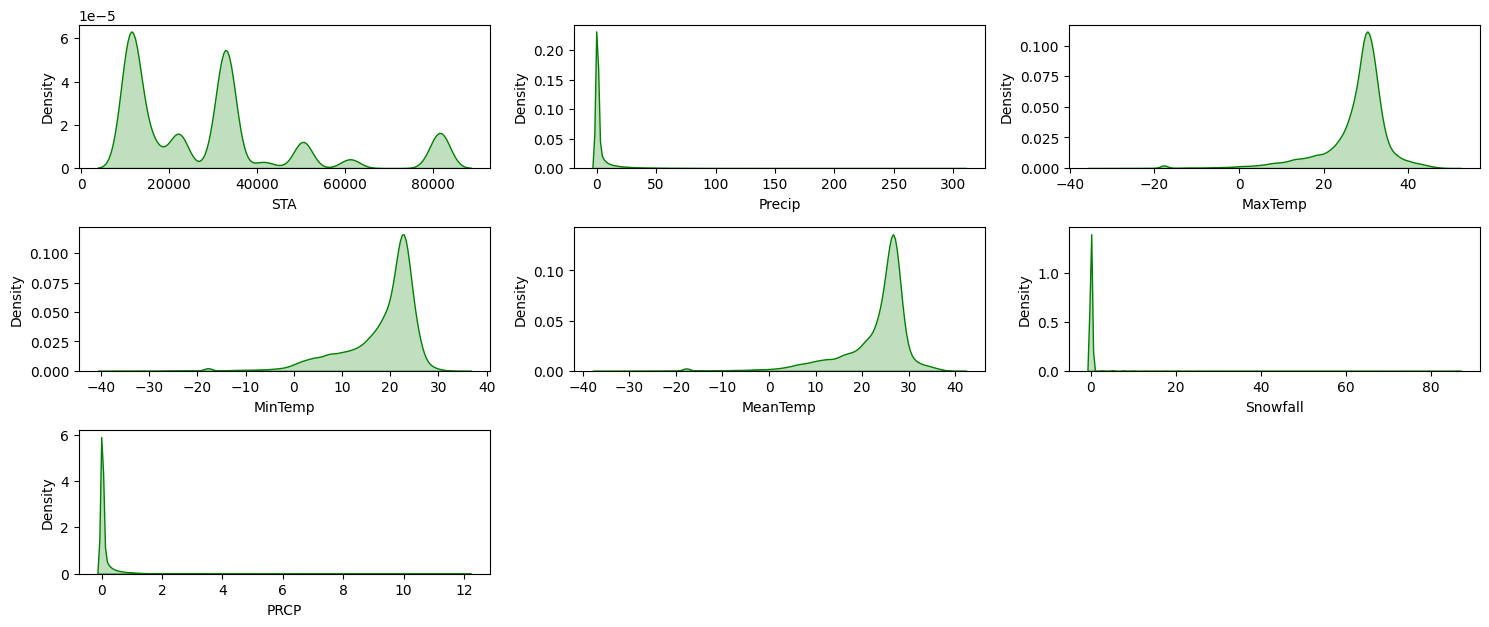

In [28]:
plt.figure(figsize=(15,10))

for i in range(0, len(df_clean.columns)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df_clean[df_clean.columns[i]],color='g',fill=True)
    plt.xlabel(df_clean.columns[i])
    plt.tight_layout()
plt.show()

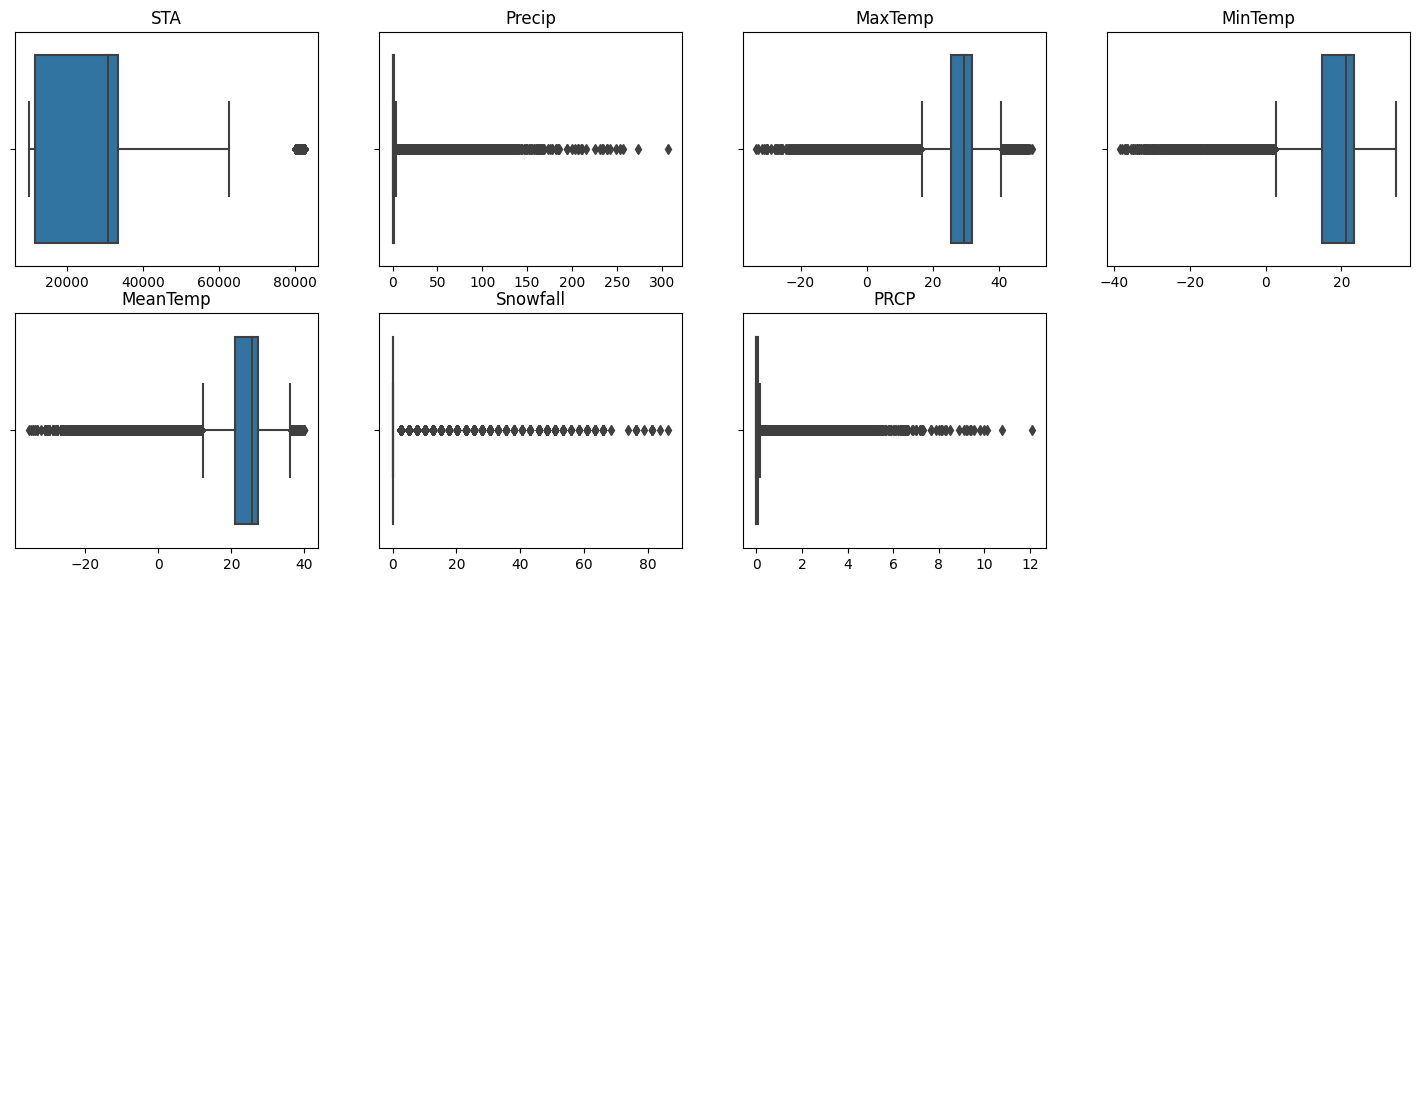

In [29]:
columns = df_clean.columns
(fig, ax) = plt.subplots(4,4,figsize=(18,14))
ax = ax.flatten()

for i, column in enumerate(columns):
    sns.boxplot(
        data=df_clean,
        x= column,
        ax = ax[i]
    )
    ax[i].set_title(f"{column}")
    ax[i].set_xlabel(None)

for i in range(i+1, len(ax)):
    ax[i].axis('off')

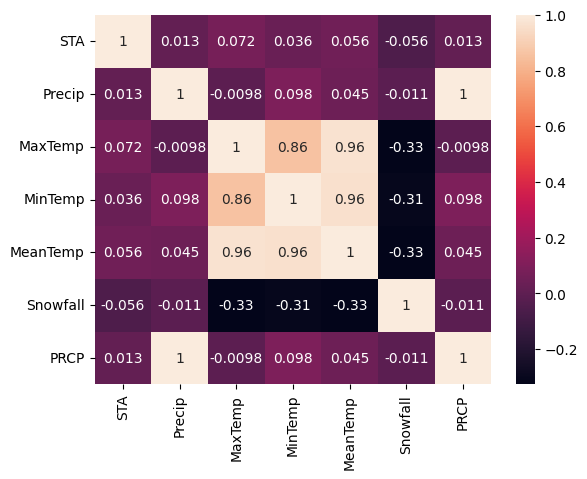

In [30]:
sns.heatmap(df_clean.corr(),annot=True)
plt.show()

In [31]:
# dependent & independent features
X = df_clean.drop('MeanTemp',axis=1)
y = df_clean['MeanTemp']

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99656 entries, 0 to 119039
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STA       99656 non-null  int64  
 1   Precip    99656 non-null  float64
 2   MaxTemp   99656 non-null  float64
 3   MinTemp   99656 non-null  float64
 4   Snowfall  99656 non-null  float64
 5   PRCP      99656 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 5.3 MB


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=15)

In [34]:
X_train.shape

(79724, 6)

In [35]:
X_test.shape

(19932, 6)

In [36]:
X_train.corr()

,STA,Precip,MaxTemp,MinTemp,Snowfall,PRCP
STA,1.000000,0.012287,0.070593,0.034071,-0.055635,0.012287
Precip,0.012287,1.000000,-0.009101,0.098015,-0.011969,1.000000
MaxTemp,0.070593,-0.009101,1.000000,0.859811,-0.325406,-0.009101
MinTemp,0.034071,0.098015,0.859811,1.000000,-0.305497,0.098015
Snowfall,-0.055635,-0.011969,-0.325406,-0.305497,1.000000,-0.011969
PRCP,0.012287,1.000000,-0.009101,0.098015,-0.011969,1.000000


In [37]:
def correlation_for_dropping(df, treshold):
    columns_to_drop = set()
    corr = df.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i, j]) > treshold:
                columns_to_drop.add(corr.columns[i])
    return columns_to_drop

In [38]:
columns_dropping = correlation_for_dropping(X_train, 0.85)

In [39]:
columns_dropping

{'MinTemp', 'PRCP'}

In [40]:
X_train.drop(columns_dropping, axis=1, inplace=True)
X_test.drop(columns_dropping, axis=1, inplace=True)

In [41]:
X_train.shape

(79724, 4)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/tmp/ipykernel_13/1732541213.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


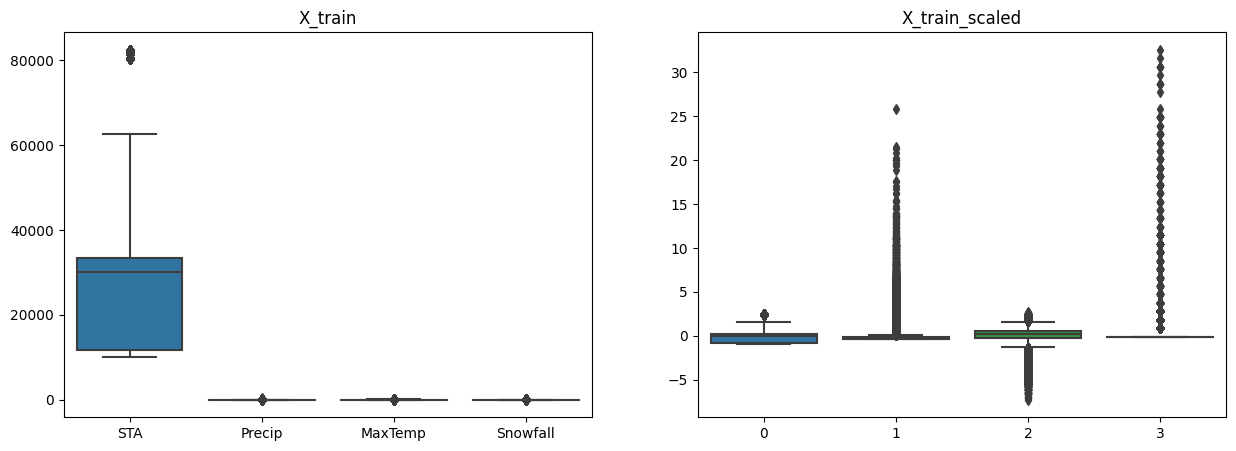

In [43]:
plt.subplots(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train')

plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train_scaled')
plt.show()

# Linear, Lasso, Ridge, ElasticNet Regressions

In [44]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Mean Absolute Error:  1.570670662483556
Mean Squared Error:  4.09654271510652
R2 Score:  0.9340101551105469


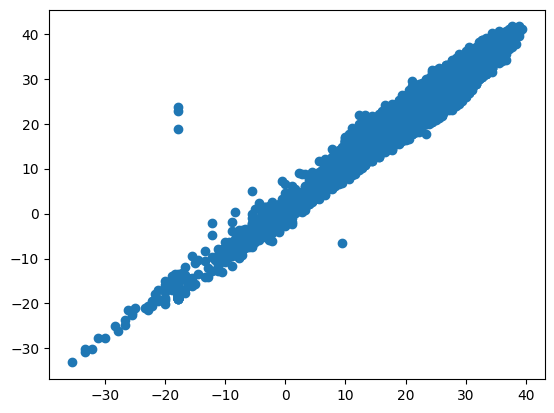

In [45]:
linear = LinearRegression()
linear.fit(X_train_scaled,y_train)
y_pred = linear.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 Score: ', score)
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute Error:  1.8150117729944035
Mean Squared Error:  5.297315671531974
R2 Score:  0.9146673026975201


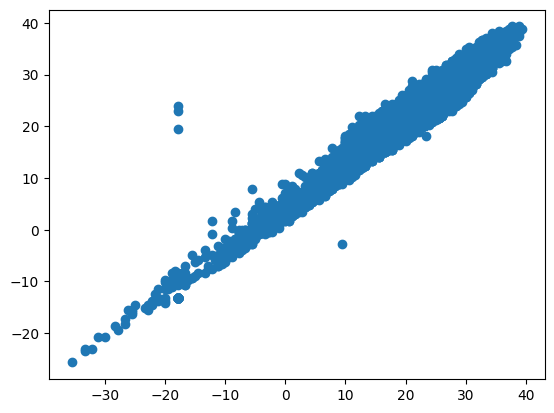

In [46]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 Score: ', score)
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute Error:  1.5706708466040065
Mean Squared Error:  4.096542185317681
R2 Score:  0.9340101636447392


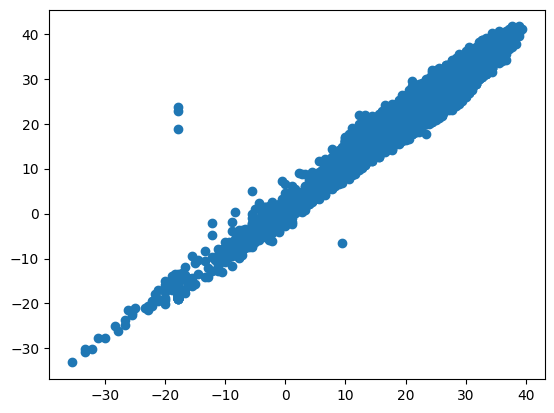

In [47]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 Score: ', score)
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute Error:  2.640484548072288
Mean Squared Error:  12.325139187392429
R2 Score:  0.80145842975891


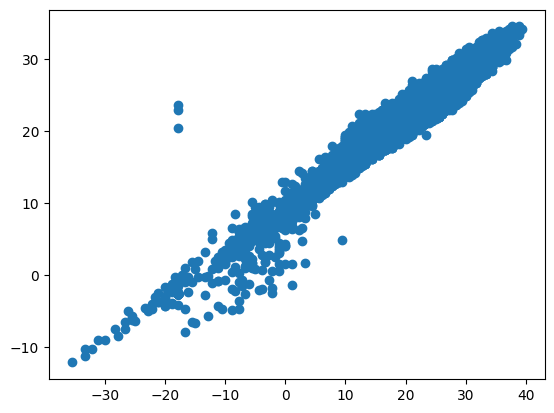

In [48]:
elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 Score: ', score)
plt.scatter(y_test, y_pred)
plt.show()

# Cross-Validation

**lasso cross validation**

Mean Absolute Error:  1.5705137294615492
Mean Squared Error:  4.096837353594451
R2 Score:  0.9340054088770838


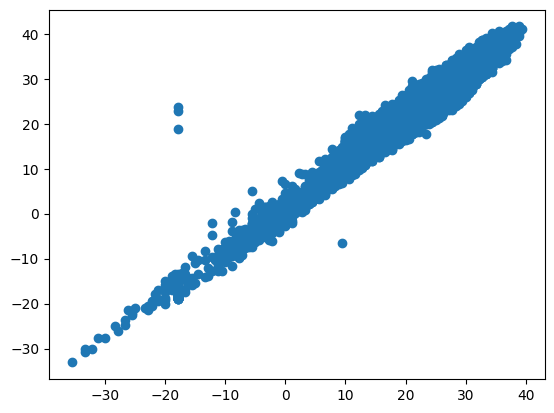

In [49]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 Score: ', score)
plt.scatter(y_test, y_pred)
plt.show()

**ridge cross validation**

Mean Absolute Error:  1.5706706808961173
Mean Squared Error:  4.096542661219764
R2 Score:  0.9340101559785907


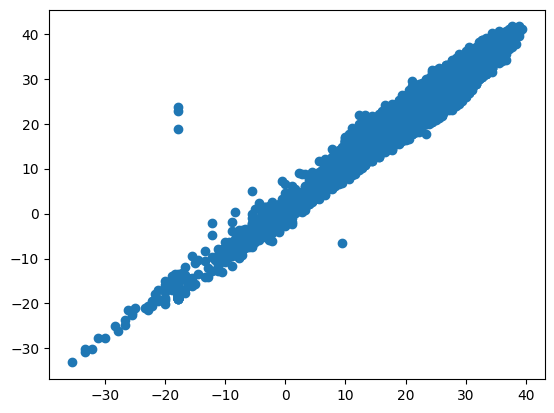

In [50]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, y_train)
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 Score: ', score)
plt.scatter(y_test, y_pred)
plt.show()

**elastic net cross validation**

Mean Absolute Error:  1.5716516098917022
Mean Squared Error:  4.100909943979661
R2 Score:  0.9339398048723149


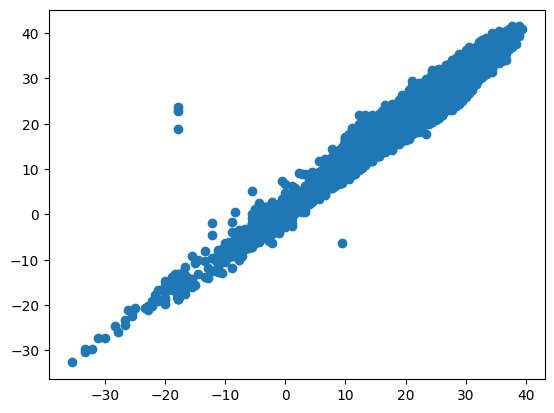

In [51]:
from sklearn.linear_model import ElasticNetCV
elasticnetcv = ElasticNetCV(cv=5)
elasticnetcv.fit(X_train_scaled, y_train)
y_pred = elasticnetcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 Score: ', score)
plt.scatter(y_test, y_pred)
plt.show()